# Data Analytics Módulo 3
------------------------

## Ejercicio de evaluación final

#### Fase 1: Exploración y limpieza de datos

In [ ]:
## Importamos las librerías que necesitaremos para la fase 1:
import pandas as pd
import numpy as np

import os ## librería que nos permite emplazar nuestro csv en la carpeta adecuada

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [23]:
## Extraemos los ficheros:
df_vuelos_info = pd.read_csv("./files/Customer Flight Activity.csv")
df_clientes = pd.read_csv("./files/Customer Loyalty History.csv")

In [24]:
## Comprobamos el contenido del primer fichero:
df_vuelos_info.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [25]:
## Hacemos algunas comprobaciones:
print(df_vuelos_info.shape)
print("-----------------")
print(len(df_vuelos_info["Loyalty Number"].unique()))
print("-----------------")
print(df_vuelos_info ["Year"].unique())
print("-----------------")
print(df_vuelos_info["Loyalty Number"].unique().sum())
print("-----------------")
print(df_vuelos_info ["Points Redeemed"].unique())
print("-----------------")
print(df_vuelos_info ["Dollar Cost Points Redeemed"].unique())

(405624, 10)
-----------------
16737
-----------------
[2017 2018]
-----------------
9200929431
-----------------
[  0 341 364 310 445 312 343 366 389 292 447 324 456 409 436 327 322 291
 323 300 290 309 325 386 321 363 340 670 443 517 444 328 344 367 313 333
 293 449 297 455 372 356 405 381 466 419 369 352 482 335 329 305 415 396
 317 348 314 334 350 330 318 298 420 336 471 680 441 353 484 301 374 417
 501 299 398 307 368 306 347 439 395 481 337 382 426 373 399 424 326 392
 438 467 480 448 308 400 376 375 460 339 385 611 431 320 362 404 442 410
 361 319 435 414 464 477 315 485 370 421 349 371 416 496 510 667 465 434
 346 487 408 500 360 378 345 358 479 380 411 491 505 446 425 476 393 418
 332 401 454 303 594 506 355 302 403 379 437 561 483 597 391 562 342 407
 490 468 488 457 365 357 463 388 413 351 462 440 493 507 338 377 428 525
 390 473 359 423 519 453 522 429 450 383 469 402 354 422 458 384 656 461
 427 478 523 719 538 515 394 472 433 387 540 530 498 512 452 311 470 541
 331 570 5

>Comprobamos la cantidad de filas y columnas, el número de clientes que han registrado sus datos de reserva al menos una vez y con cuantos años de registro contamos. Hacemos una última comprobación para saber si las dos columnas que a simple vista parecen vacías tienen datos; en efecto sí tienen datos más allá de cero.

In [26]:
df_vuelos_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


>Con un _info_ podemos ver algunas cosas de la base de datos; no hay nulos a primera vista, todas las columnas tienen valores, también vemos el tipo de dato de cada columna, todos son int  excepto un float en los puntos acumulados. Las columnas de  años y meses están tambien en float.

In [27]:
df_vuelos_info.insert(1,"Date", pd.to_datetime(df_vuelos_info[["Year", "Month"]].assign(day=1)))
df_vuelos_info.drop(columns=["Year", "Month"], inplace=True)

>Vamos a convertir las columnas de _Year_ y _Month_ en una única columna y de paso la creamos como _datetime_. Como solo se especifica mes y año pondremos por defecto dia 1.

In [28]:
##  Comprobamos que se ha guardado la columna Date y que han sido eliminadas Year y Month.
df_vuelos_info.head()

,Loyalty Number,Date,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017-01-01,3,0,3,1521,152.0,0,0
1,100102,2017-01-01,10,4,14,2030,203.0,0,0
2,100140,2017-01-01,6,0,6,1200,120.0,0,0
3,100214,2017-01-01,0,0,0,0,0.0,0,0
4,100272,2017-01-01,0,0,0,0,0.0,0,0


In [29]:
## Comprobamos que la columna Date está en datetime
df_vuelos_info.dtypes

Loyalty Number                          int64
Date                           datetime64[ns]
Flights Booked                          int64
Flights with Companions                 int64
Total Flights                           int64
Distance                                int64
Points Accumulated                    float64
Points Redeemed                         int64
Dollar Cost Points Redeemed             int64
dtype: object

In [30]:
## Sacamos información extra de algunas columnas
print(df_vuelos_info[["Distance", "Flights Booked", "Flights with Companions", "Total Flights", "Points Accumulated", "Points Redeemed", "Dollar Cost Points Redeemed"]].describe().T)

                                count         mean          std  min  25%  \
Distance                     405624.0  1208.880059  1433.155320  0.0  0.0   
Flights Booked               405624.0     4.115052     5.225518  0.0  0.0   
Flights with Companions      405624.0     1.031805     2.076869  0.0  0.0   
Total Flights                405624.0     5.146858     6.521227  0.0  0.0   
Points Accumulated           405624.0   123.692721   146.599831  0.0  0.0   
Points Redeemed              405624.0    30.696872   125.486049  0.0  0.0   
Dollar Cost Points Redeemed  405624.0     2.484503    10.150038  0.0  0.0   

                               50%     75%     max  
Distance                     488.0  2336.0  6293.0  
Flights Booked                 1.0     8.0    21.0  
Flights with Companions        0.0     1.0    11.0  
Total Flights                  1.0    10.0    32.0  
Points Accumulated            50.0   239.0   676.5  
Points Redeemed                0.0     0.0   876.0  
Dollar Cost 

In [31]:
## Revisamos el segundo fichero
df_clientes.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


>Podemos ver algunas cosas visualizando las 5 primeras filas; Hay columnas numéricas y categóricas, se conecta con la otra base de datos en la columna _Loyalty Number_ que aparece en ambas con el mismo nombre. Podemos ver ya algunos datos nulos en algunas columnas y que hay una fecha nuevamente dividida en dos columnas de mes y año.

In [32]:
## Primeras comprobaciones:
print(df_clientes.shape)
print("-----------------")
print(df_clientes ["Loyalty Card"].unique())
print("-----------------")
print(df_clientes ["Enrollment Type"].unique())
print("-----------------")
print(df_clientes.duplicated(subset="Loyalty Number").sum)

(16737, 16)
-----------------
['Star' 'Aurora' 'Nova']
-----------------
['Standard' '2018 Promotion']
-----------------
<bound method Series.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
16732    False
16733    False
16734    False
16735    False
16736    False
Length: 16737, dtype: bool>


>Comprobamos el número de filas y columnas, también que en las columnas _Loyalty Card_ y _Enrollment Type_ haya más de un dato y por último si hay algún _Loyalty Number_ repetido (para evitar errores de duplicados, estavariable tiene que ser única  ya que cada fila representa a un cliente único). Comparando los resultados de las dos columnas _Loyalty Number_ de ambas tablas vemos tambiém que en ambas hay el mismo número de clientes (16737 registros no repetidos) por lo que probablemente cada cliente de esta tabla tenga registros de sus vuelos en la primera base de datos.

In [ ]:
## Volviendo a limpieza: Haciendo el análisis y visualización hemos visto que la columna Country solo tiene un dato, comprobamos y eliminamos columna.
print(df_clientes ["Country"].unique())
df_clientes.drop(columns=["Country"], inplace=True)
df_clientes.head()

['Canada']


,Loyalty Number,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [34]:
## Hacemos un info
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Province            16737 non-null  object 
 2   City                16737 non-null  object 
 3   Postal Code         16737 non-null  object 
 4   Gender              16737 non-null  object 
 5   Education           16737 non-null  object 
 6   Salary              12499 non-null  float64
 7   Marital Status      16737 non-null  object 
 8   Loyalty Card        16737 non-null  object 
 9   CLV                 16737 non-null  float64
 10  Enrollment Type     16737 non-null  object 
 11  Enrollment Year     16737 non-null  int64  
 12  Enrollment Month    16737 non-null  int64  
 13  Cancellation Year   2067 non-null   float64
 14  Cancellation Month  2067 non-null   float64
dtypes: float64(4), int64(3), object(8)
memory usage: 1.9+

>Como vimos al principio hay tanto datos de tipo int como object y un par de floats. hay cuatro columnas de fechas de inscripción y cancelación de la cuenta que están en int y float respectivamente, esto último es innecesario ya que años y meses no necesitan decimales. Procederemos a agrupar estas cuatro columnas en dos y a ponerlas en formato de fecha.

>Una última cosa que podemos observar es los datos nulos que tenemos. Solo hay nulos en la columna _salary_, y en las fechas de cancelación.

In [ ]:
## Hacemos una funcion para compactar columnas de fecha en una:
def compact_column_date(
    df,
    col_año,
    col_mes,
    nueva_col_fecha,
    pos=None,
    eliminar_antiguas_col=False
):
    fecha = pd.to_datetime(
        df[[col_año, col_mes]]
        .rename(columns={
            col_año: "year",
            col_mes: "month"
        })
        .assign(day=1),
    )
    
    if pos is None:
        df[nueva_col_fecha] = fecha
    else:
        df.insert(pos, nueva_col_fecha, fecha)
    
    if eliminar_antiguas_col:
        df.drop(columns=[col_año, col_mes], inplace=True)

In [36]:
## aplicamos la función a las cuatro columnas:
compact_column_date(
    df_clientes,
    "Enrollment Year",
    "Enrollment Month",
    "Enrollment Date",
    pos=12,
    eliminar_antiguas_col=True
)


In [37]:
compact_column_date(
    df_clientes,
    "Cancellation Year",
    "Cancellation Month",
    "Cancellation Date",
    pos=13,
    eliminar_antiguas_col=True
)

In [38]:
df_clientes.head()

,Loyalty Number,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Date,Cancellation Date
0,480934,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016-02-01,NaT
1,549612,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016-03-01,NaT
2,429460,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014-07-01,2018-01-01
3,608370,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013-02-01,NaT
4,530508,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014-10-01,NaT


In [112]:
## Comprobamos nulos
(df_clientes[["Salary", "Cancellation Date"]].isnull().sum()/df_clientes.shape[0]*100).round(2)

Salary               25.32
Cancellation Date    87.65
dtype: float64

>Vemos que hay un 25% de nulos en la columna _Salary_ y casi un 90% en _Cancellation date_, lo cual tiene sentido ya que solo algunos clientes cerraron sus suscripciones. 

>Nuestra primera base de datos está formada fundamentalmente por datos numéricos y la segunda tiene también bastantes variables categóricas. Nos conviene tener ambas unidas para poder comparar parámetros de ambas. Tienen la columna _Loyalty Number_ en común por lo que será el nexo para unirlas.

In [40]:
## Utilizaremos un merge para unir ambas tablas por la columna común:
df_datos_totales = df_clientes.merge(df_vuelos_info, left_on= "Loyalty Number", right_on= "Loyalty Number")
df_datos_totales.head()

,Loyalty Number,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Date,Cancellation Date,Date,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,480934,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016-02-01,NaT,2017-01-01,0,0,0,0,0.0,0,0
1,480934,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016-02-01,NaT,2017-02-01,3,0,3,2823,282.0,0,0
2,480934,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016-02-01,NaT,2017-03-01,0,0,0,0,0.0,0,0
3,480934,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016-02-01,NaT,2017-04-01,0,0,0,0,0.0,0,0
4,480934,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016-02-01,NaT,2018-10-01,6,2,8,3352,335.0,465,38


In [41]:
df_datos_totales.shape

(405624, 21)

>Comprobamos que el número de filas coincide con el de la tabla de vuelos (la que tiene nás columnas) por lo que se deduce como sospechábamos que todos los datos de la tabla __df_vuelos_info__ tienen coincidencia con los de la tabla __df_clientes__. Usar la función merge en este caso ha sido la mejor opción.

In [124]:
## Guardamos la nueva tabla en un csv
df_datos_totales.to_csv(os.path.join("./files", "total_data.csv"), index=False, encoding= 'utf-8')

#### Fase 2: Análisis estadístico y visualización

In [42]:
## Comprobamos las columnas que tenemos en la tabla df_vuelos_info
df_vuelos_info.columns

Index(['Loyalty Number', 'Date', 'Flights Booked', 'Flights with Companions',
       'Total Flights', 'Distance', 'Points Accumulated', 'Points Redeemed',
       'Dollar Cost Points Redeemed'],
      dtype='object')

In [43]:
## 1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

vuelos_por_mes = (
    df_vuelos_info.groupby(df_vuelos_info["Date"].dt.to_period("M"))["Flights Booked"]
      .sum()
      .reset_index()
)
print(vuelos_por_mes.sort_values(by ="Flights Booked", ascending = False).head(7))

       Date  Flights Booked
18  2018-07          104143
17  2018-06           92749
19  2018-08           90512
6   2017-07           89288
23  2018-12           88397
5   2017-06           80493
7   2017-08           78692


Text(0.5, 1.0, 'vuelos por mes')

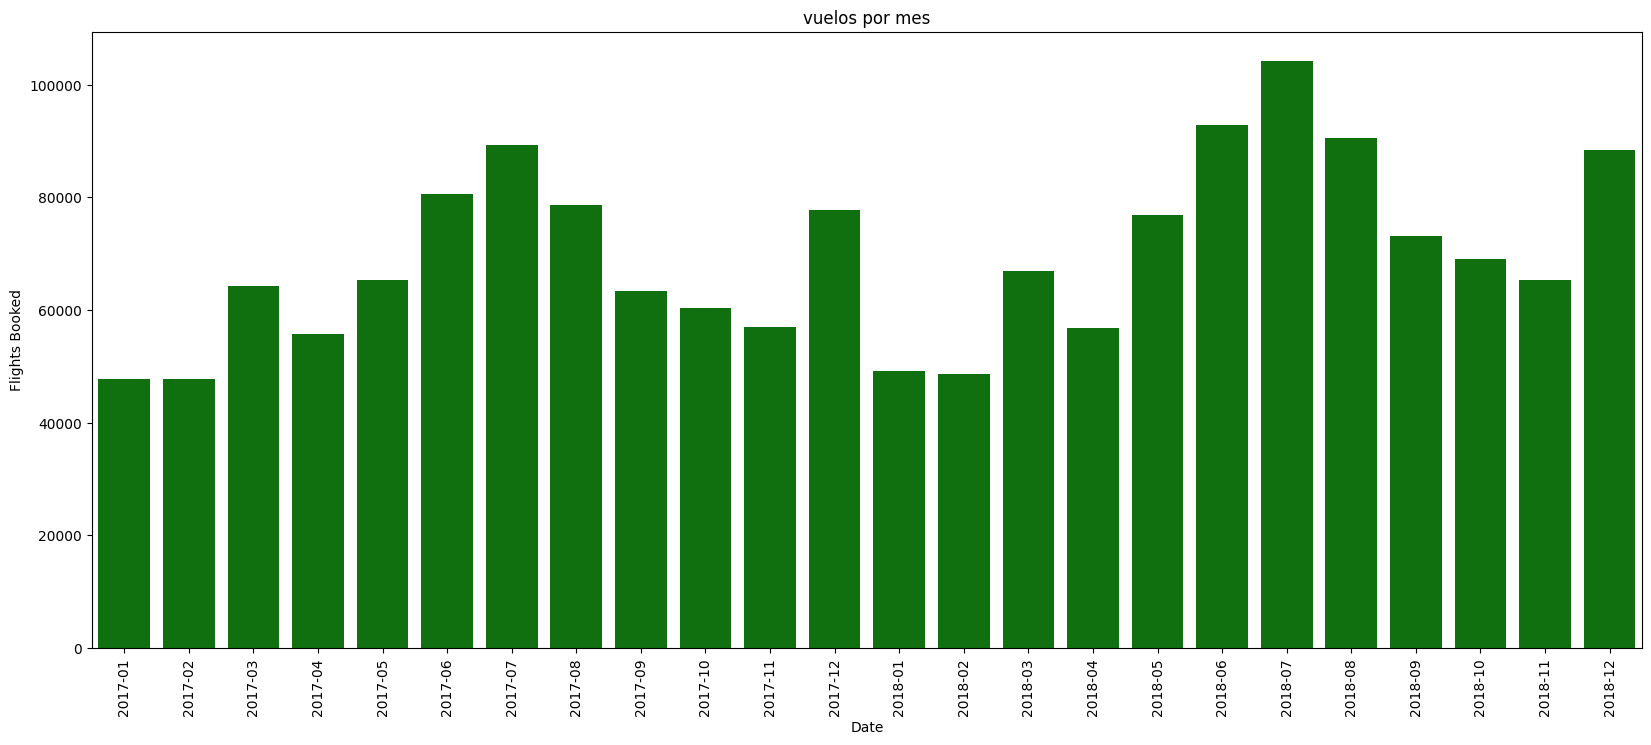

In [74]:
## Visualización
plt.figure(figsize =(20,8))
sns.barplot(data=vuelos_por_mes,
    x="Date",
    y="Flights Booked",
    color="green")
plt.xticks(rotation=90)
plt.title("vuelos por mes")

>Vemos tanto en la tabla como en el gráfico que hay un comportamiento cíclico a lo largo del año. En los  meses estivales así como en diciembre (fiestas navideñas) están los picos de reservas ambos años.

In [45]:
df_vuelos_info["Year"] = df_vuelos_info["Date"].dt.year
df_vuelos_info["Month"] = df_vuelos_info["Date"].dt.month

vuelos_por_mes_2 = (
    df_vuelos_info.groupby(["Year", "Month"])["Flights Booked"]
      .sum()
      .reset_index())
print(vuelos_por_mes_2.sort_values(by ="Flights Booked", ascending = False).head(7))

    Year  Month  Flights Booked
18  2018      7          104143
17  2018      6           92749
19  2018      8           90512
6   2017      7           89288
23  2018     12           88397
5   2017      6           80493
7   2017      8           78692


>En esta tabla se ve claramente cómo en junio, julio, agosto y diciembre hay una mayor reserva de vuelos.

<Axes: xlabel='Month', ylabel='Flights Booked'>

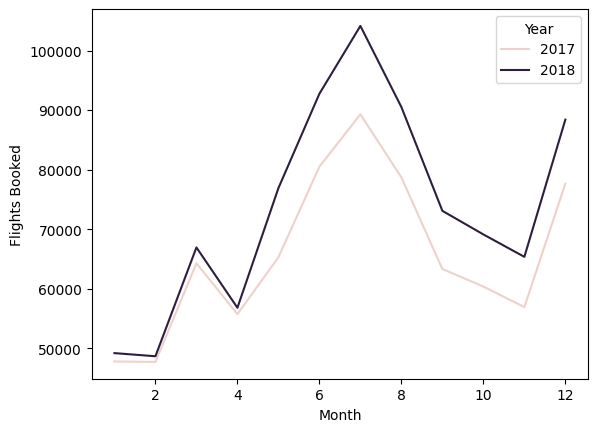

In [46]:
sns.lineplot(
    data=vuelos_por_mes_2,
    x="Month",
    y="Flights Booked",
    hue="Year"
)


>Por último, en este gráfico, además de lo dicho anteriormente se puede ver en general una mayor reserva de vuelos en 2018 con respecto del año anterior.

In [47]:
## 2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?
df_datos_totales[["Distance", "Points Accumulated"]].describe().round(2)

,Distance,Points Accumulated
count,405624.00,405624.00
mean,1208.88,123.69
std,1433.16,146.60
min,0.00,0.00
25%,0.00,0.00
50%,488.00,50.00
75%,2336.00,239.00
max,6293.00,676.50


>Tenemos una distancia promedio de 1209 (millas o km) y un promedio de 124 puntos por registro. Hay una desviación estandar alta en distancia lo que nos indica que hay mucha variabilidad de distancias voladas en los datos, lo mismo ocurre más o menos con los puntos acumulados. El valor mínimo en ambas es 0, lo que nos indica registros sin vuelos y sin puntos acumulados y el valor máximo de ambas columnas es bastante mayor al promedio, lo que nos indica que hay clientes con mucha actividad. El primer percentil nos indica que un 25% de los registros es 0 en ambas, sin vuelos reservados muy probablemente. La mediana tiene valores de 488 y 50 respectivamente; Comparando ambos valores con el promedio nos puede indicar que lo que eleva el promedio son algunos valores muy grandes, es decir, algunos clientes vuelan grandes distancias y acumulan muchos puntos, lo que eleva la media. Queda confirmado al observar el percentil 75 que las mayores distancias y acumulaciones de puntos se encuentran ahí.

>Si observamos la tendencia de ambas variables, se observa que la acumulación de puntos parece crecer y decrecer acorde a la distancia, por lo que parece que sí hay una relación.

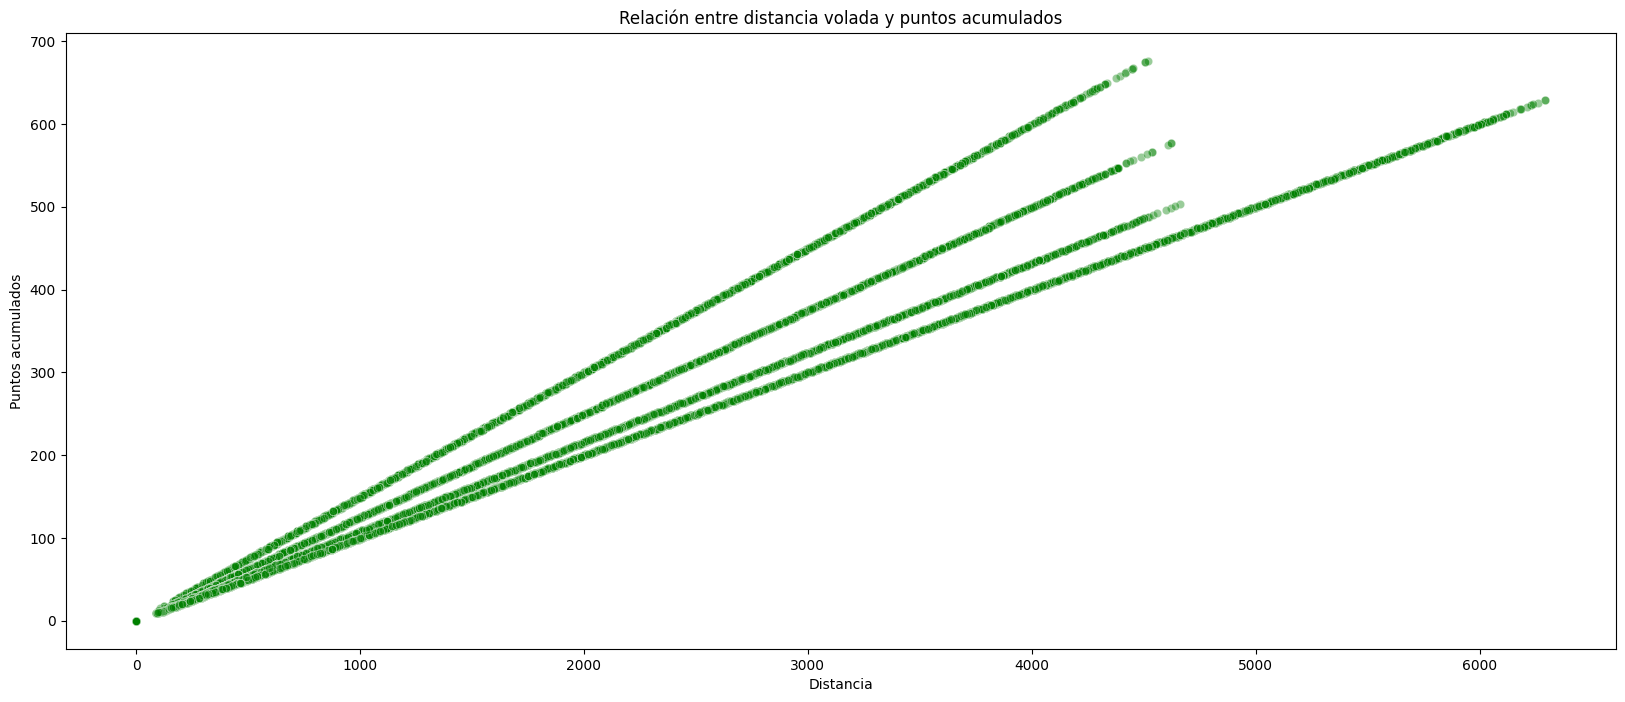

In [48]:
## Visualización
plt.figure(figsize =(20,8))
sns.scatterplot(
    data=df_datos_totales,
    x="Distance",
    y="Points Accumulated",
    alpha=0.4,
    color="green"
)
plt.title("Relación entre distancia volada y puntos acumulados")
plt.xlabel("Distancia")
plt.ylabel("Puntos acumulados")
plt.show()


>En la gráfica se confirma lo que se veía con números, parece que la distancia recorrida va de la mano con la acumulación de puntos.

In [114]:
## Vamos a ver cómo se comportan estas dos variables respecto al tipo de tarjeta

df_datos_totales["Distance_Group"] = "Sin vuelos"
mask = df_datos_totales["Distance"] > 0 ## solución a error, si no, al haber muchos datos con cero da error, eliminamos los datos cero
df_datos_totales.loc[mask, "Distance_Group"] = pd.qcut(
    df_datos_totales.loc[mask, "Distance"],
    q=4,
    labels=["Corta", "Media", "Larga", "Muy larga"]
)

df_datos_totales["Distance_Group"].value_counts(dropna=False)
Grupo_distancia = (
    df_datos_totales
    .groupby("Distance_Group")
    .agg(
        mean_distance=("Distance", "mean"),
        mean_points=("Points Accumulated", "mean"),
        median_points=("Points Accumulated", "median"),
        std_points=("Points Accumulated", "std"),
        count=("Points Accumulated", "count")
    )
)

Grupo_distancia

,mean_distance,mean_points,median_points,std_points,count
Distance_Group,,,,,
Corta,971.448787,100.258982,103.68,34.702187,51911
Larga,2716.517910,279.658376,276.00,36.276192,51982
Media,1878.753586,193.479250,192.00,31.115320,51933
Muy larga,3882.610952,393.449266,380.00,60.758692,51806
Sin vuelos,0.000000,0.000000,0.00,0.000000,197992


In [115]:
df_datos_totales["Points_per_Distance"] = (
    df_datos_totales["Points Accumulated"] / df_datos_totales["Distance"]
)

df_datos_totales["Points_per_Distance"].describe()

count    207632.000000
mean          0.102652
std           0.009410
min           0.091743
25%           0.099740
50%           0.099885
75%           0.100000
max           0.150000
Name: Points_per_Distance, dtype: float64

In [116]:
tarjeta_distancia = (
    df_datos_totales
    .groupby("Loyalty Card")
    .agg(
        mean_distance=("Distance", "mean"),
        mean_points=("Points Accumulated", "mean"),
        mean_ratio=("Points_per_Distance", "mean"),
        count=("Points Accumulated", "count")
    )
    .sort_values("mean_ratio", ascending=False)
)

tarjeta_distancia

,mean_distance,mean_points,mean_ratio,count
Loyalty Card,,,,
Aurora,1208.259412,127.324572,0.106219,83832
Nova,1202.435654,123.366312,0.102969,137568
Star,1213.974802,122.283774,0.100804,184224


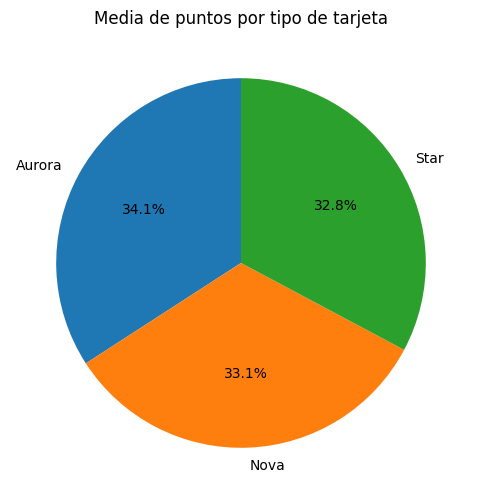

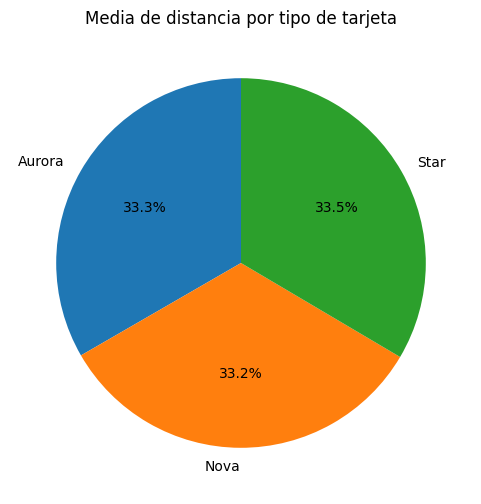

In [117]:
plt.figure(figsize=(6,6))
plt.pie(
    tarjeta_distancia['mean_points'],
    labels=tarjeta_distancia.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Media de puntos por tipo de tarjeta')
plt.show()

plt.figure(figsize=(6,6))
plt.pie(
    tarjeta_distancia['mean_distance'],
    labels=tarjeta_distancia.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Media de distancia por tipo de tarjeta')
plt.show()

>Parece que tanto la obtención de puntos como las distancias recorridas están muy equilibradas en cuanto a las tarjetas

In [118]:
## 3. ¿Cuál es la distribución de los clientes por provincia o estado?
tabla_provincia = (
    df_datos_totales
    .drop_duplicates(subset="Loyalty Number")
    .groupby(["Province", "City"])
    .agg(Clientes=("Loyalty Number", "count"))
    .reset_index()
)

tabla_provincia["Percentage (%)"] = (
    tabla_provincia["Clientes"] / tabla_provincia["Clientes"].sum() * 100
).round(2)

tabla_provincia.sort_values("Percentage (%)", ascending=False)

,Province,City,Clientes,Percentage (%)
20,Ontario,Toronto,3351,20.02
6,British Columbia,Vancouver,2582,15.43
24,Quebec,Montreal,2059,12.30
10,Manitoba,Winnipeg,658,3.93
9,British Columbia,Whistler,582,3.48
14,Nova Scotia,Halifax,518,3.09
17,Ontario,Ottawa,509,3.04
25,Quebec,Quebec City,485,2.90
21,Ontario,Trenton,486,2.90
2,Alberta,Edmonton,486,2.90


>Podemos ver que las ciudades con más clientes son _Toronto_, _Edmonton_ y _Dawson Creek_ en las provincias _Ontario_, _Alberta_ y _British Columbia_ respectivamente y la que menos clientes tiene sería _Charlottetown_ en _Prince Edward Island_.

In [56]:
provincia_totales = (
    tabla_provincia
    .groupby("Province")["Clientes"]
    .sum()
    .sort_values(ascending=False)
)
provincia_totales

Province
Ontario                 5404
British Columbia        4409
Quebec                  3300
Alberta                  969
Manitoba                 658
New Brunswick            636
Nova Scotia              518
Saskatchewan             409
Newfoundland             258
Yukon                    110
Prince Edward Island      66
Name: Clientes, dtype: int64

>Aquí podemos ver el mismo comportamiento agrupado en provincias.

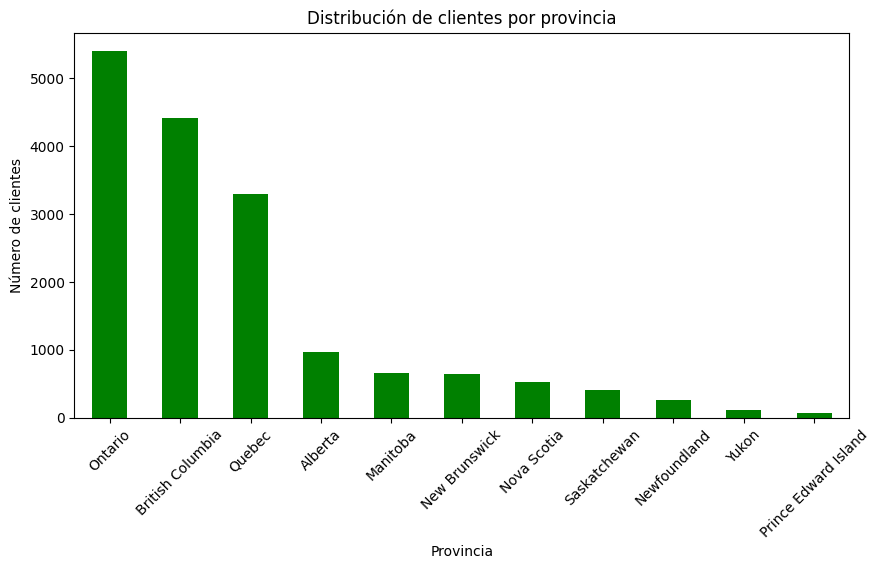

In [95]:
## Visualización
plt.figure(figsize=(10,5))
provincia_totales.plot(kind="bar", color="green")
plt.title("Distribución de clientes por provincia")
plt.ylabel("Número de clientes")
plt.xlabel("Provincia")
plt.xticks(rotation=45)
plt.show()

>En este gráfico se puede ver de nuevo la distribución de clientes por provincia.

In [58]:
top_ciudades = (
    tabla_provincia
    .sort_values("Clientes", ascending=False)
    .groupby("Province")
    .head(5)
)

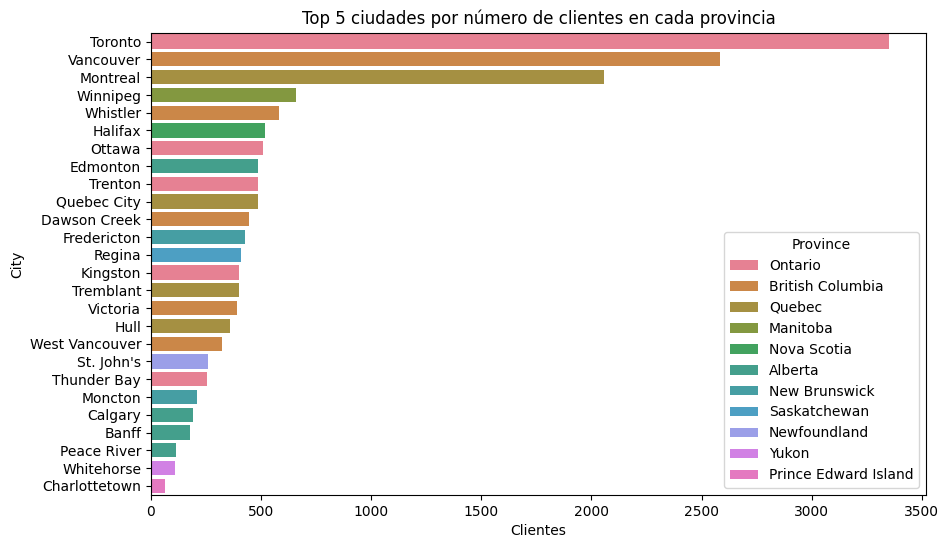

In [119]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=top_ciudades,
    x="Clientes",
    y="City",
    hue="Province"
)
plt.title("Top 5 ciudades por número de clientes en cada provincia")
plt.show()

>Aquí podemos ver la distribución por provincia y ciudades en orden ascendente.

In [120]:
## 4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?
print(df_datos_totales ["Education"].unique())

['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']


In [121]:
salario_educacion = (
    df_datos_totales
    .groupby("Education")
    .agg(
        mean_salary=("Salary", "mean"),
        median_salary=("Salary", "median"),
        std_salary=("Salary", "std"),
        count=("Salary", "count")
    )
    .sort_values("mean_salary", ascending=False)
)

salario_educacion

,mean_salary,median_salary,std_salary,count
Education,,,,
Doctor,178335.439516,180440.0,70307.642502,17856
Master,103767.494163,105487.0,17514.343573,12336
Bachelor,72669.312393,72029.0,16594.537958,253296
High School or Below,61126.640961,61806.0,12106.082753,18984
College,NaN,NaN,NaN,0


>Lo primero que se observa es que, como es lógico, el salario de las personas cuyo nivel educativo es _College_ es nulo pues se infiere que todos ellos son menores de edad. También que el salario medio asciende conforme el nivel educativo es más alto.

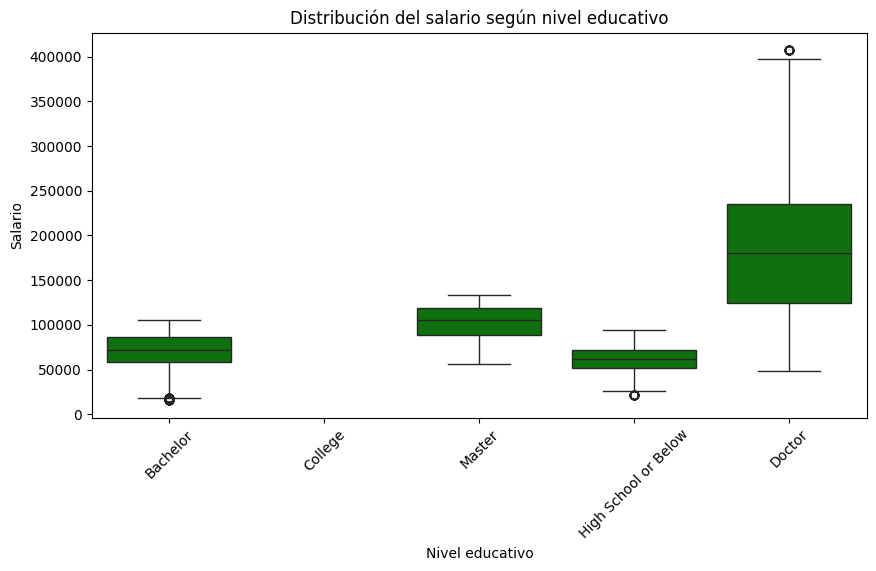

In [122]:
plt.figure(figsize=(10,5))
sns.boxplot(
    data=df_datos_totales,
    x="Education",
    y="Salary",
    color= "green"
)
plt.title("Distribución del salario según nivel educativo")
plt.xlabel("Nivel educativo")
plt.ylabel("Salario")
plt.xticks(rotation=45)
plt.show()

>Al usar un Boxplot podemos notar que hay salarios negativos en _Bachelor_ y _High school or Below_. Vamos a investigar y corregirlo.

In [78]:
salarios_negativos = df_datos_totales[df_datos_totales['Salary'] < 0]

# Ver cuántos son y algunos ejemplos
print(f"Número de salarios negativos: {len(salarios_negativos)}")
print(salarios_negativos.head())

Número de salarios negativos: 480
       Loyalty Number Province      City Postal Code Gender  \
26328          542976   Quebec  Montreal     H2Y 4R4   Male   
26329          542976   Quebec  Montreal     H2Y 4R4   Male   
26330          542976   Quebec  Montreal     H2Y 4R4   Male   
26331          542976   Quebec  Montreal     H2Y 4R4   Male   
26332          542976   Quebec  Montreal     H2Y 4R4   Male   

                  Education   Salary Marital Status Loyalty Card      CLV  \
26328  High School or Below -49830.0       Divorced         Star  24127.5   
26329  High School or Below -49830.0       Divorced         Star  24127.5   
26330  High School or Below -49830.0       Divorced         Star  24127.5   
26331  High School or Below -49830.0       Divorced         Star  24127.5   
26332  High School or Below -49830.0       Divorced         Star  24127.5   

      Enrollment Type Enrollment Date Cancellation Date       Date  \
26328  2018 Promotion      2018-03-01               Na

>Hay 480 datos de salario negativo en total pero observando las fechas de inscripción y los números de socio no parecen muchos los clientes con negativos en el salario.

In [123]:
cols_interes = ['Salary', 'Education', 'Loyalty Number', 'Marital Status']
print(salarios_negativos[cols_interes])

         Salary             Education  Loyalty Number Marital Status
26328  -49830.0  High School or Below          542976       Divorced
26329  -49830.0  High School or Below          542976       Divorced
26330  -49830.0  High School or Below          542976       Divorced
26331  -49830.0  High School or Below          542976       Divorced
26332  -49830.0  High School or Below          542976       Divorced
...         ...                   ...             ...            ...
405595 -57297.0              Bachelor          906428        Married
405596 -57297.0              Bachelor          906428        Married
405597 -57297.0              Bachelor          906428        Married
405598 -57297.0              Bachelor          906428        Married
405599 -57297.0              Bachelor          906428        Married

[480 rows x 4 columns]


In [82]:
print(salarios_negativos["Loyalty Number"].unique())

[542976 959977 232755 525245 603070 491242 115505 430398 152016 194065
 212128 790475 366599 436087 364596 239955 347013 729561 734647 906428]


>Haciendo un conteo solo 20 clientes en total tienen números negativos. Es bastante probable que haya sido un error al introducir los datos. Podríamos volver los datos positivos entendiendo que los clientes trataron de poner un guión al introducir los datos, pero la cantidad parece coincidir en todos en relación a su nivel educativo (-4983 para Hig School y -57297 para Bachelor), lo que podría significar un valor por defecto o algún dato no representativo. Vimos al principio del análisis de las bases de datos que el número tota de clientes era de 16737 por lo que los datos de 20 clientes representan solo el 0,12% de la muestra, por lo que la decisión menos ariesgada será convertir los datos negativos en nulos.

In [83]:
df_datos_totales.loc[df_datos_totales['Salary'] < 0, 'Salary'] = np.nan

In [84]:
salario_educacion = (
    df_datos_totales
    .groupby("Education")
    .agg(
        mean_salary=("Salary", "mean"),
        median_salary=("Salary", "median"),
        std_salary=("Salary", "std"),
        count=("Salary", "count")
    )
    .sort_values("mean_salary", ascending=False)
)

salario_educacion

,mean_salary,median_salary,std_salary,count
Education,,,,
Doctor,178335.439516,180440.0,70307.642502,17856
Master,103767.494163,105487.0,17514.343573,12336
Bachelor,72669.312393,72029.0,16594.537958,253296
High School or Below,61126.640961,61806.0,12106.082753,18984
College,NaN,NaN,NaN,0


>Tras la limpieza vemos que los datos cambian un poco pero la tendencia es la misma.

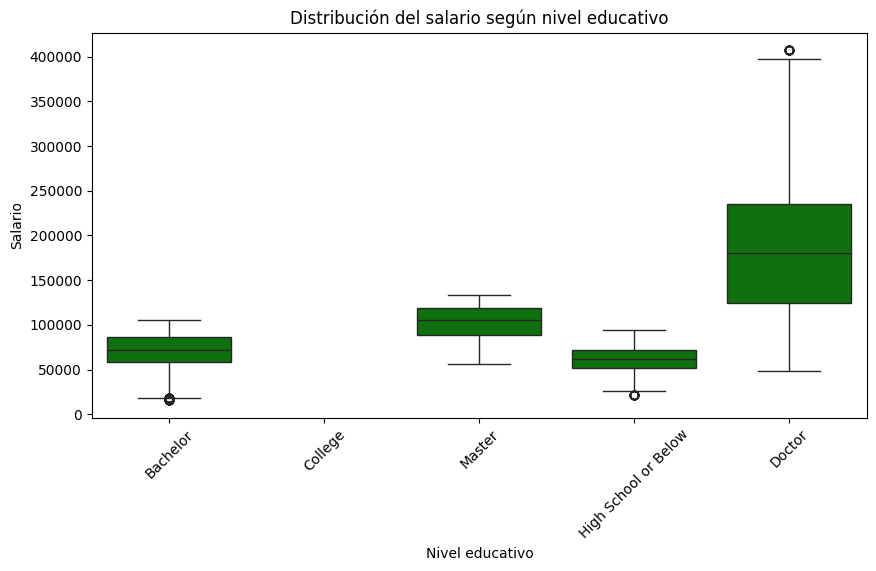

In [88]:
plt.figure(figsize=(10,5))
sns.boxplot(
    data=df_datos_totales,
    x="Education",
    y="Salary",
    color= "green"
)
plt.title("Distribución del salario según nivel educativo")
plt.xlabel("Nivel educativo")
plt.ylabel("Salario")
plt.xticks(rotation=45)
plt.show()

>Las medianas son más altas cuanto mayor es el nivel educativo. Las cajas de _High school_, _Bachelor_ y _Master_ estrecha, en el caso de _Master_ los salarios están en un rango un poco más bajo. _Bachelor y High school_ tienen outler bajo pero ya no hay negativos. La mediana en _Doctor_ se encuentra mucho más elevada, la desviación estandar es amplia, lo que indica gran variabilidad en los salarios y hay un outlier alto, por encima de los 400,000. Todo esto nos indica, como ya sospechábamos que hay roles muy bien remunerados dentro del grupo.

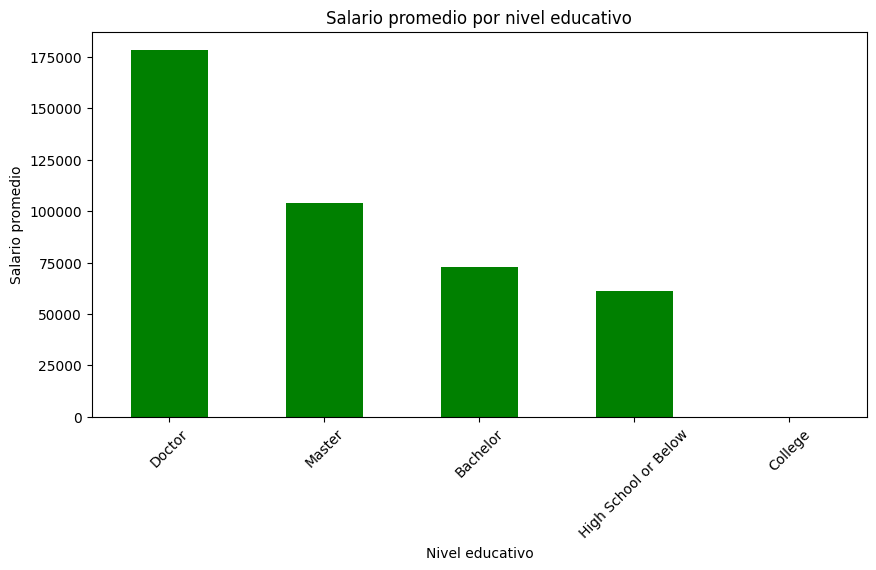

In [97]:
plt.figure(figsize=(10,5))
salario_educacion["mean_salary"].plot(kind="bar", color="green")
plt.title("Salario promedio por nivel educativo")
plt.ylabel("Salario promedio")
plt.xlabel("Nivel educativo")
plt.xticks(rotation=45)
plt.show()


In [ ]:

## 5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?
conteo_tarjetas = df_datos_totales.groupby('Loyalty Card')['Loyalty Number'].nunique()
proporcion_tarjetas_gb = conteo_tarjetas / conteo_tarjetas.sum() * 100
tabla_tarjetas = pd.DataFrame({
    'Clientes': conteo_tarjetas,
    'Porcentaje (%)': proporcion_tarjetas_gb.round(2)
})

tabla_tarjetas


,Clientes,Porcentaje (%)
Loyalty Card,,
Aurora,3429,20.49
Nova,5671,33.88
Star,7637,45.63


C:\Users\jenni\AppData\Local\Temp\ipykernel_73336\875057041.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


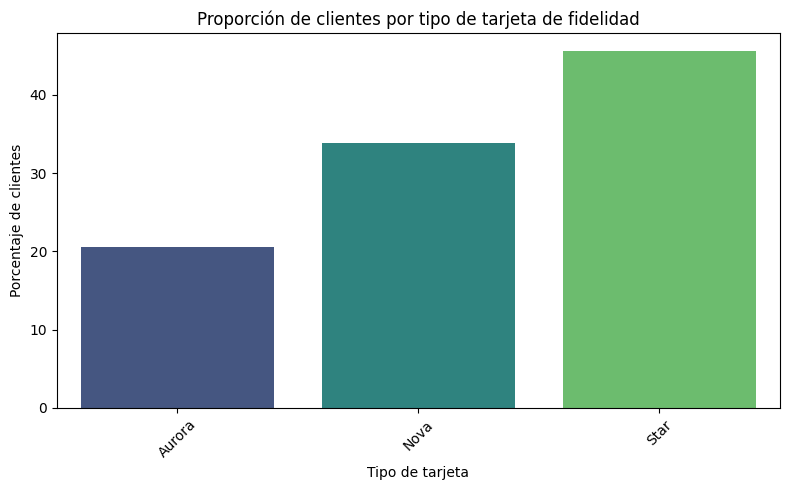

In [65]:
plt.figure(figsize=(8,5))
sns.barplot(
    x=tabla_tarjetas.index,
    y=tabla_tarjetas['Porcentaje (%)'],
    palette='viridis'
)

plt.title('Proporción de clientes por tipo de tarjeta de fidelidad')
plt.xlabel('Tipo de tarjeta')
plt.ylabel('Porcentaje de clientes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

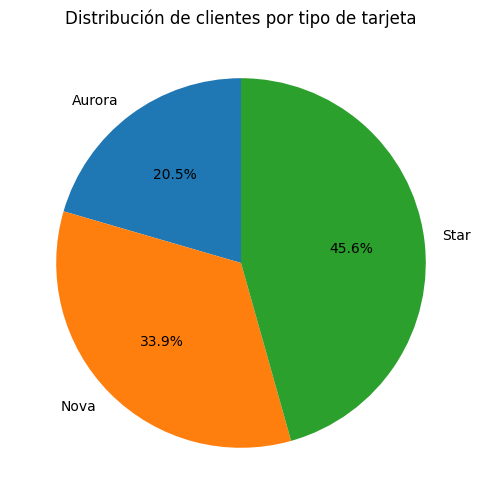

In [100]:
plt.figure(figsize=(6,6))
plt.pie(
    tabla_tarjetas['Clientes'],
    labels=tabla_tarjetas.index,
    autopct='%1.1f%%',
    startangle=90,
)
plt.title('Distribución de clientes por tipo de tarjeta')
plt.show()

In [ ]:
## 6. ¿Cómo se distribuyen los clientes según su estado civil y género?
conteo_estado_genero = df_datos_totales.groupby(
    ['Marital Status', 'Gender']
)['Loyalty Number'].nunique()

conteo_estado_genero = conteo_estado_genero.reset_index()
conteo_estado_genero.rename(columns={'Loyalty Number': 'Clientes'}, inplace=True)

conteo_estado_genero

,Marital Status,Gender,Clientes
0,Divorced,Female,1269
1,Divorced,Male,1249
2,Married,Female,4869
3,Married,Male,4866
4,Single,Female,2272
5,Single,Male,2212


>En cuanto al género, no vemos grandes diferencias, hay un número `parecido de mujeres y hombres. En cuanto al estado civil hay una grán mayoría de casados frente a divorciados y solteros.

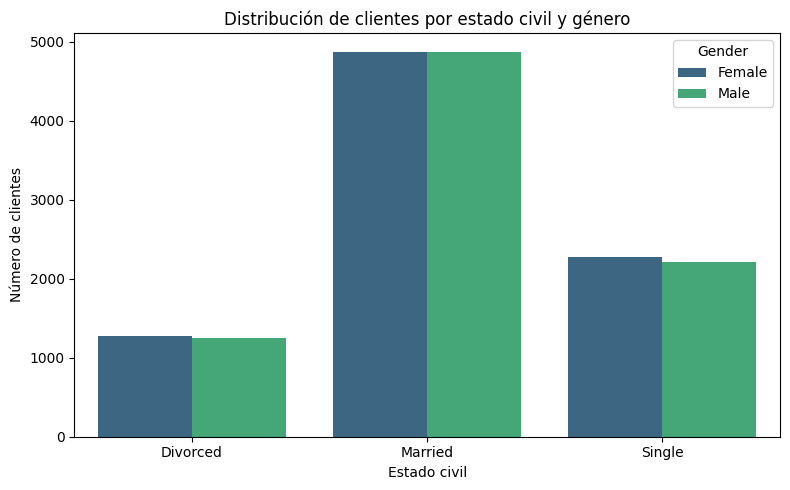

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=conteo_estado_genero,
    x='Marital Status',
    y='Clientes',
    hue='Gender', 
    palette='viridis'
)

plt.title('Distribución de clientes por estado civil y género')
plt.xlabel('Estado civil')
plt.ylabel('Número de clientes')
plt.tight_layout()
plt.show()

>En el gráfico se puede ver claro lo dicho anteriormente, no hay gran diferencia en cuanto aL género y hay prácticamente el doble de casados que de solteros. Los divorciados representanel grupo de menor presencia. 

#### Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo

Pregunta: 
- ¿Existen diferencias en el número de vuelos reservados según el nivel educativo del cliente?

Variables:
1. Variable categórica: Education (Bachelor, College, Master, etc.)
2. Variable numérica: Flights Booked 

In [104]:
vuelos_educacion = df_datos_totales.groupby(
    ['Loyalty Number', 'Education']
)['Flights Booked'].sum().reset_index()
vuelos_educacion.head()

,Loyalty Number,Education,Flights Booked
0,100018,Bachelor,157
1,100102,College,173
2,100140,College,152
3,100214,Bachelor,79
4,100272,Bachelor,127


In [71]:
estadisticas = vuelos_educacion.groupby('Education')['Flights Booked'].agg(['mean','median','std','count']).round(2)
estadisticas

,mean,median,std,count
Education,,,,
Bachelor,99.10,113.0,54.23,10475
College,100.61,113.0,54.21,4238
Doctor,100.87,115.0,55.93,734
High School or Below,101.01,115.0,54.87,782
Master,101.60,113.0,54.02,508


>Si miramos la media de vuelos reservados según nivel educativo no vemos grandes diferencias, tampoco en la mediana ni en la desviación estandar. Quizás con un gráfico Boxplot podamos salir de dudas:

C:\Users\jenni\AppData\Local\Temp\ipykernel_73336\1712142161.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


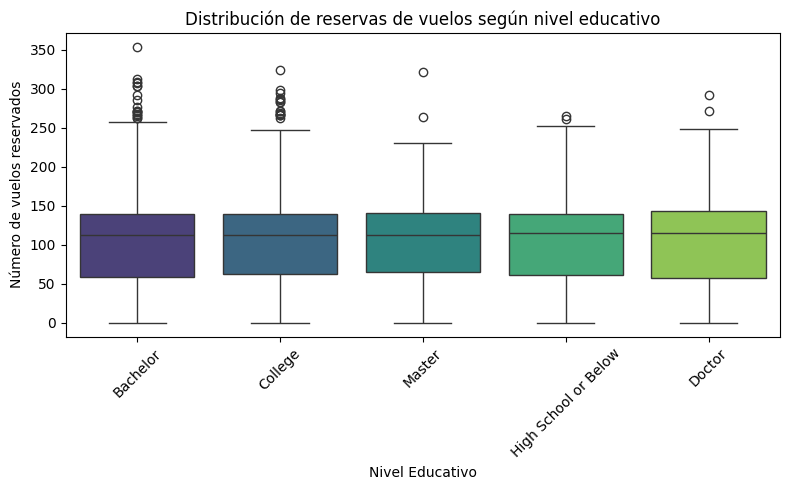

In [72]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data=vuelos_educacion,
    x='Education',
    y='Flights Booked',
    palette='viridis'
)
plt.title('Distribución de reservas de vuelos según nivel educativo')
plt.xlabel('Nivel Educativo')
plt.ylabel('Número de vuelos reservados')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

>Como veíamos antes, todos los niveles educativos tienen medianas similares, lo que nos indica que no hay un grán impacto del nivel educativo en el número de vuelos reservados. La amplitud de las cajas es bastante similar por lo que la variabiliodad intermedia de los vuelos también es parecida. El rango fuera de la cajes bastante uniforme, destaca por arriba sobre todo _Bachelor_.
En cuanto a los outliers _Bachelor y college_ tienen un gran número de ellos por arriba lo que indica que hay algunos clientes con esos niveles educativos que reservan muchos más vuelos que el promedio.

>Aunque _Bachelor y College_ tengan algunos valores atípicos, en general no se ve un patrón claro que nos permita sugerir que existan diferencias de reservas en cuanto al nivel educativo.